In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm
from scipy.stats import chi2
from scipy.stats import ncx2
from ipywidgets import interact, interactive, fixed, interact_manual
%matplotlib inline

## Relation between normal and $\chi^{2}$ distribution

### Random variable $\hat{x}$ ~ $\mathcal{N}(E[\hat{x}], V[\hat{x}])$ 

Distributed as a normal with parameters:

- Mean: `xhat_mean`
- std. deviation: `xhat_stdev`

Parameters of the normal distribution

In [2]:
xhat_mean  = 5.0
xhat_stdev = 0.6

Draw samples from the distribution

In [3]:
nsamples = 10000

In [4]:
x = norm.rvs(size=nsamples, loc=xhat_mean, scale=xhat_stdev)

Distribution of the sample

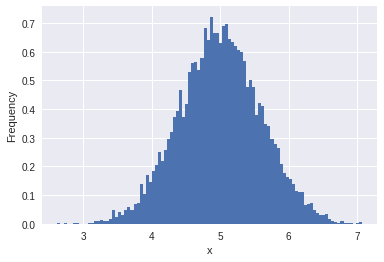

In [5]:
f, a = plt.subplots(nrows=1, ncols=1);
a.hist(x, normed=True, histtype='stepfilled', bins=100);
a.set_xlabel('x');
a.set_ylabel('Frequency');

### Relative squared deviation

Relative squared deviation is defined as:

$ s = y^{2} = \frac{(\hat{x} - x_{0})^{2}}{\sigma^{2}}$

$y =  \frac{\hat{x} - x_{0}}{\sigma}$ 

Note that if below:

- `x0 = xhat_mean`

and

- `sigma = xhat_stdev`

Then $y$ is a random variable normal distributed with:
- $E[y] = 0$
- $V[y] = 1$

and $s$ is the square of a random variable that is standard normal distributed $\implies$ we expect that $s$ follows $\chi^{2}$ distribution with $k = 1$ degrees of freedom.

In [6]:
x0    = xhat_mean
sigma = xhat_stdev

#### Constructing a centered and normalized random variable

In [7]:
y = (x-x0)/sigma

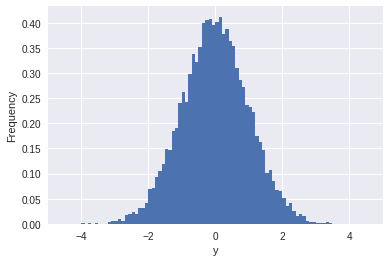

In [8]:
f, a = plt.subplots(nrows=1, ncols=1);
a.hist(y, normed=True, histtype='stepfilled', bins=100, range=(-5, 5));
a.set_xlim(-5.0, 5.0)
a.set_xlabel('y');
a.set_ylabel('Frequency');

#### Constructing a sample of relative squared deviation  from the $x$'s we generated above.

In [9]:
s = y**2

Distribution of s

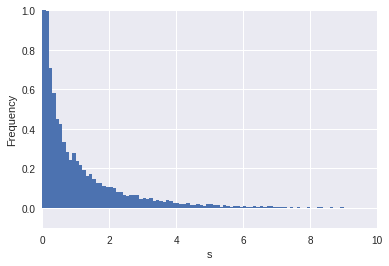

In [10]:
f, a = plt.subplots(nrows=1, ncols=1);
a.hist(s, normed=True, histtype='stepfilled', bins=100, range=(0, 10));
a.set_xlim(0.0, 10)
a.set_ylim(-0.1, 1.0)
a.set_xlabel('s');
a.set_ylabel('Frequency');

### Comparing distribution of $s$ and the $\chi^{2} (df)$ distribution

$\chi^{2}$ distribution parameteres

In [11]:
df = 1

In [12]:
x_pdf = np.linspace(chi2.ppf(0.01, df), chi2.ppf(0.99, df), 100)

Show both the distribution of $s$ and the $\chi^{2}$ p.d.f.:

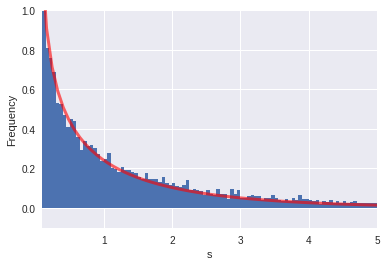

In [27]:
f, a = plt.subplots(nrows=1, ncols=1);
a.hist(s, normed=True, bins=100, range=(0, 5));
a.plot(x_pdf, chi2.pdf(x_pdf, df), 'r-', lw=3, alpha=0.6, label='chi2 pdf');
a.set_xlim(0.1, 5);
a.set_ylim(-0.1, 1.0);
a.set_xlabel('s');
a.set_ylabel('Frequency');

## Non-central $\chi^{2}$

### Random variable $\hat{x}$

Normal distributed with parameters:

- Mean: `xhat_mean`
- std. deviation: `xhat_stdev`

Parameters of the normal distribution

In [14]:
xhat_mean  = 5.0
xhat_stdev = 2.0

Draw samples from the distribution

In [15]:
nsamples = 10000

In [16]:
x = norm.rvs(size=nsamples, loc=xhat_mean, scale=xhat_stdev)

Distribution of the sample

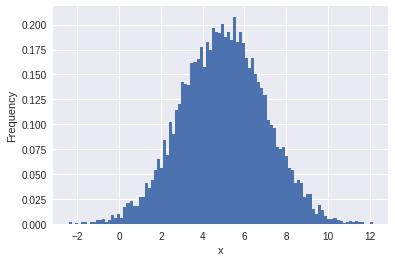

In [17]:
f, a = plt.subplots(nrows=1, ncols=1);
a.hist(x, normed=True, histtype='stepfilled', bins=100);
a.set_xlabel('x');
a.set_ylabel('Frequency');

### Relative squared deviation

Relative squared deviation is defined ad:

$ s = y^{2} = \frac{(\hat{x} - x_{0})^{2}}{\sigma^{2}}$

Note that if below:

- `sigma = xhat_stdev`

Then $y$ is a random variable normal distributed with:
- $E[y] = \mu = \frac{E[\hat{x}]}{\sigma} - \frac{x_{0}}{\sigma}$
- $V[y] = 1$

and $s$ is the square of this normal distributed random variable $\implies$ we expect that $s$ follows non-central $\chi^{2}$ distribution with $k = 1$ degrees of freedom.

In [18]:
x0    = 4.0
sigma = xhat_stdev

#### Constructing a normalized random variable

In [19]:
y = (x-x0)/sigma

In [20]:
y_mean = (xhat_mean/sigma) - (x0/sigma)

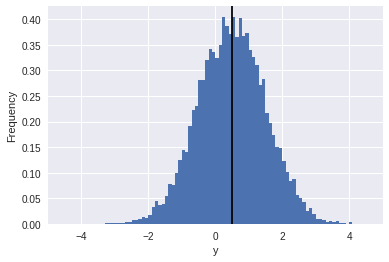

In [21]:
f, a = plt.subplots(nrows=1, ncols=1);
a.hist(y, normed=True, histtype='stepfilled', bins=100, range=(-5, 5));
a.set_xlim(-5.0, 5.0);
a.axvline(y_mean, c='k')
a.set_xlabel('y');
a.set_ylabel('Frequency');

#### Constructing a sample of relative squared deviation  from the $x$'s we generated above.

In [22]:
s = y**2

Distribution of s

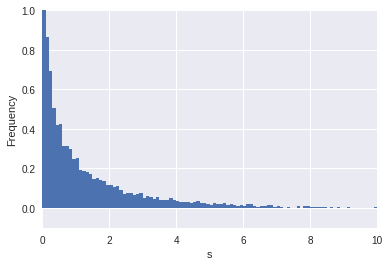

In [23]:
f, a = plt.subplots(nrows=1, ncols=1);
a.hist(s, normed=True, histtype='stepfilled', bins=100, range=(0, 10));
a.set_xlim(0.0, 10)
a.set_ylim(-0.1, 1.0)
a.set_xlabel('s');
a.set_ylabel('Frequency');

### Comparing distribution of $s$ and the noncentral $\chi^{2}(df,nc)$ distribution

$\chi^{2}$ distribution parameteres

In [24]:
df = 1
nc = y_mean**2

In [25]:
x_pdf = np.linspace(ncx2.ppf(0.01, df, nc), ncx2.ppf(0.99, df, nc), 100)

Show both the distribution of $s$ and the $\chi^{2}$ p.d.f.:

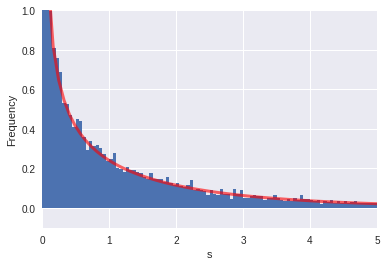

In [28]:
f, a = plt.subplots(nrows=1, ncols=1);
a.hist(s, normed=True, bins=100, range=(0, 5));
a.plot(x_pdf, ncx2.pdf(x_pdf, df, nc), 'r-', lw=3, alpha=0.6, label='chi2 pdf');
a.set_xlim(0, 5);
a.set_ylim(-0.1, 1.0);
a.set_xlabel('s');
a.set_ylabel('Frequency');